In [1]:
import numpy as np
import matplotlib.image as matimage
from matplotlib import pyplot as matpyplot
from PIL import Image, ImageFilter
import math

In [2]:
# Function that converts color image to Grayscale
def converttograyscale(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# Input image
image = matimage.imread('test.png')     

In [3]:
# Function to normalize standard deviation
def deviation_normalization(x, m, std_dev):
    return 1 / (np.sqrt(2 * np.pi) * std_dev) * np.e ** (-np.power((x - m) / std_dev, 2) / 2)

In [4]:
# Function to define the gaussian filter kernel
def define_gaussian_kernel(k_size, sigma=1, verbose=False):
    kernel_1_dimension = np.linspace(-(k_size // 2), k_size // 2, k_size)
    for i in range(k_size):
        kernel_1_dimension[i] = deviation_normalization(kernel_1_dimension[i], 0, sigma)
    kernel_2_dimension = np.outer(kernel_1_dimension.T, kernel_1_dimension.T)
 
    kernel_2_dimension *= 1.0 / kernel_2_dimension.max()
 
    if verbose:
        matpyplot.imshow(kernel_2_dimension, interpolation='none', cmap='gray')
        matpyplot.title("Kernel for this Image ( {}X{} )".format(k_size, k_size))
        matpyplot.show()
 
    return kernel_2_dimension

In [5]:
#
def image_convolution(image, kernel, average = False, verbose = False):
    if len(image.shape) == 3:
        print("3 Channels found for the input Image : {}".format(image.shape))
        image = converttograyscale(image)    
        matpyplot.imshow(image, cmap = matpyplot.get_cmap('gray'), vmin = 0, vmax = 1)
        matpyplot.show()
        print("Image Converted to Gray Channel. Size is : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape Size : {}".format(kernel.shape))
 
    if verbose:
        matpyplot.imshow(image, cmap = 'gray')
        matpyplot.title("Input Image")
        matpyplot.show()
 
    input_image_rows, input_image_columns = image.shape
    image_kernel_rows, image_kernel_columns = kernel.shape
 
    output_image = np.zeros(image.shape)
 
    padding_height = int((image_kernel_rows - 1) / 2)
    padding_width = int((image_kernel_columns - 1) / 2)
 
    final_padded_image = np.zeros((input_image_rows + (2 * padding_height), input_image_columns + (2 * padding_width)))
 
    final_padded_image[padding_height:final_padded_image.shape[0] - padding_height, padding_width:final_padded_image.shape[1] - padding_width] = image
 
    if verbose:
        matpyplot.imshow(final_padded_image, cmap='gray')
        matpyplot.title("Final Padded Image")
        matpyplot.show()
 
    for row in range(input_image_rows):
        for col in range(input_image_columns):
            output_image[row, col] = np.sum(kernel * final_padded_image[row:row + image_kernel_rows, col:col + image_kernel_columns])
            if average:
                output_image[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Size of the Output Image : {}".format(output_image.shape))
 
    if verbose:
        matpyplot.imshow(output_image, cmap='gray')
        matpyplot.title("Output Image using Size {}X{} Kernel".format(image_kernel_rows, image_kernel_columns))
        matpyplot.show()
 
    return output_image

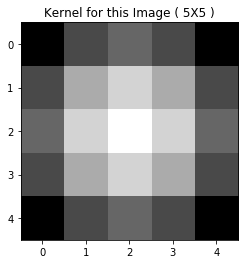

3 Channels found for the input Image : (1250, 1000, 3)


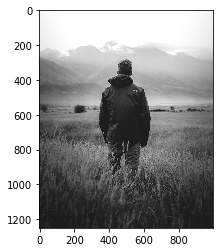

Image Converted to Gray Channel. Size is : (1250, 1000)
Kernel Shape Size : (5, 5)


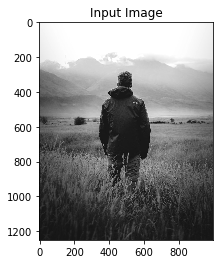

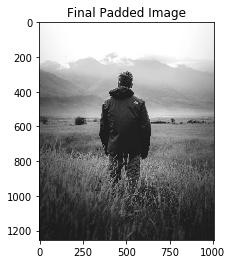

Size of the Output Image : (1250, 1000)


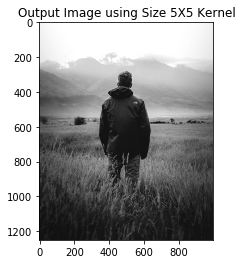

In [6]:
# Final function calls to kernel and convolution functions defined above
def gaussian_filter(image, kernel_size, verbose=False):
    kernel = define_gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    output = image_convolution(image, kernel, average=True, verbose=verbose)
    
gaussian_filter(image, 5, verbose=True)